In [3]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)   # Mostrar todas las columnas
pd.set_option('display.width', 1000)         # Ajusta el ancho de visualización
pd.set_option('display.max_colwidth', None)

archivo= ('C:\\Users\\dg_an\\Desktop\\DATA\\AbandonoEmpleados\\AbandonoEmpleados.csv')
df=pd.read_csv(archivo, sep = ";", index_col="id",na_values="#N/D")
print(df)

      edad abandono             viajes            departamento  distancia_casa      educacion        carrera  empleados satisfaccion_entorno  sexo implicacion  nivel_laboral                     puesto satisfaccion_trabajo estado_civil  salario_mes  num_empresas_anteriores mayor_edad horas_extra  incremento_salario_porc evaluacion satisfaccion_companeros  horas_quincena  nivel_acciones  anos_experiencia  num_formaciones_ult_ano conciliacion  anos_compania  anos_en_puesto  anos_desde_ult_promocion  anos_con_manager_actual
id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

In [6]:
df.isna().sum().sort_values(ascending=False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
viajes                         0
carrera                        0
distancia_casa                 0
departamento                   0
satisfaccion_entorno           0
empleados                      0
nivel_laboral                  0
abandono                       0
edad                           0
estado_civil                   0
puesto                         0
salario_mes                    0
num_empresas_anteriores        0
incremento_salario_porc        0
evaluacion                     0
mayor_edad                     0
horas_extra                    0
horas_quincena                 0
satisfaccion_companeros        0
anos_experiencia               0
nivel_acciones                 0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
anos_con_m

In [7]:
df.drop(columns=["anos_en_puesto","conciliacion"],inplace=True)

In [8]:
df.isna().sum().sort_values(ascending=False)

sexo                        199
educacion                   101
satisfaccion_trabajo         76
implicacion                  18
abandono                      0
distancia_casa                0
departamento                  0
viajes                        0
carrera                       0
satisfaccion_entorno          0
empleados                     0
nivel_laboral                 0
edad                          0
puesto                        0
estado_civil                  0
salario_mes                   0
num_empresas_anteriores       0
mayor_edad                    0
horas_extra                   0
incremento_salario_porc       0
evaluacion                    0
satisfaccion_companeros       0
horas_quincena                0
nivel_acciones                0
anos_experiencia              0
num_formaciones_ult_ano       0
anos_compania                 0
anos_desde_ult_promocion      0
anos_con_manager_actual       0
dtype: int64

In [9]:
#EDA VARIABLES NUMERICAS
def graficos_eda_categoricos (cat):
    from math import ceil
    filas = ceil(cat.shape[1] / 2)
    #Definimos el gráfico
    f, ax = plt.subplots (nrows = filas, ncols = 2, figsize = (16, filas * 6))
    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2 ax = ax.flat
    ax=ax.flat
    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat [variable].value_counts().plot.barh (ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold") 
        ax[cada].tick_params (labelsize = 12)

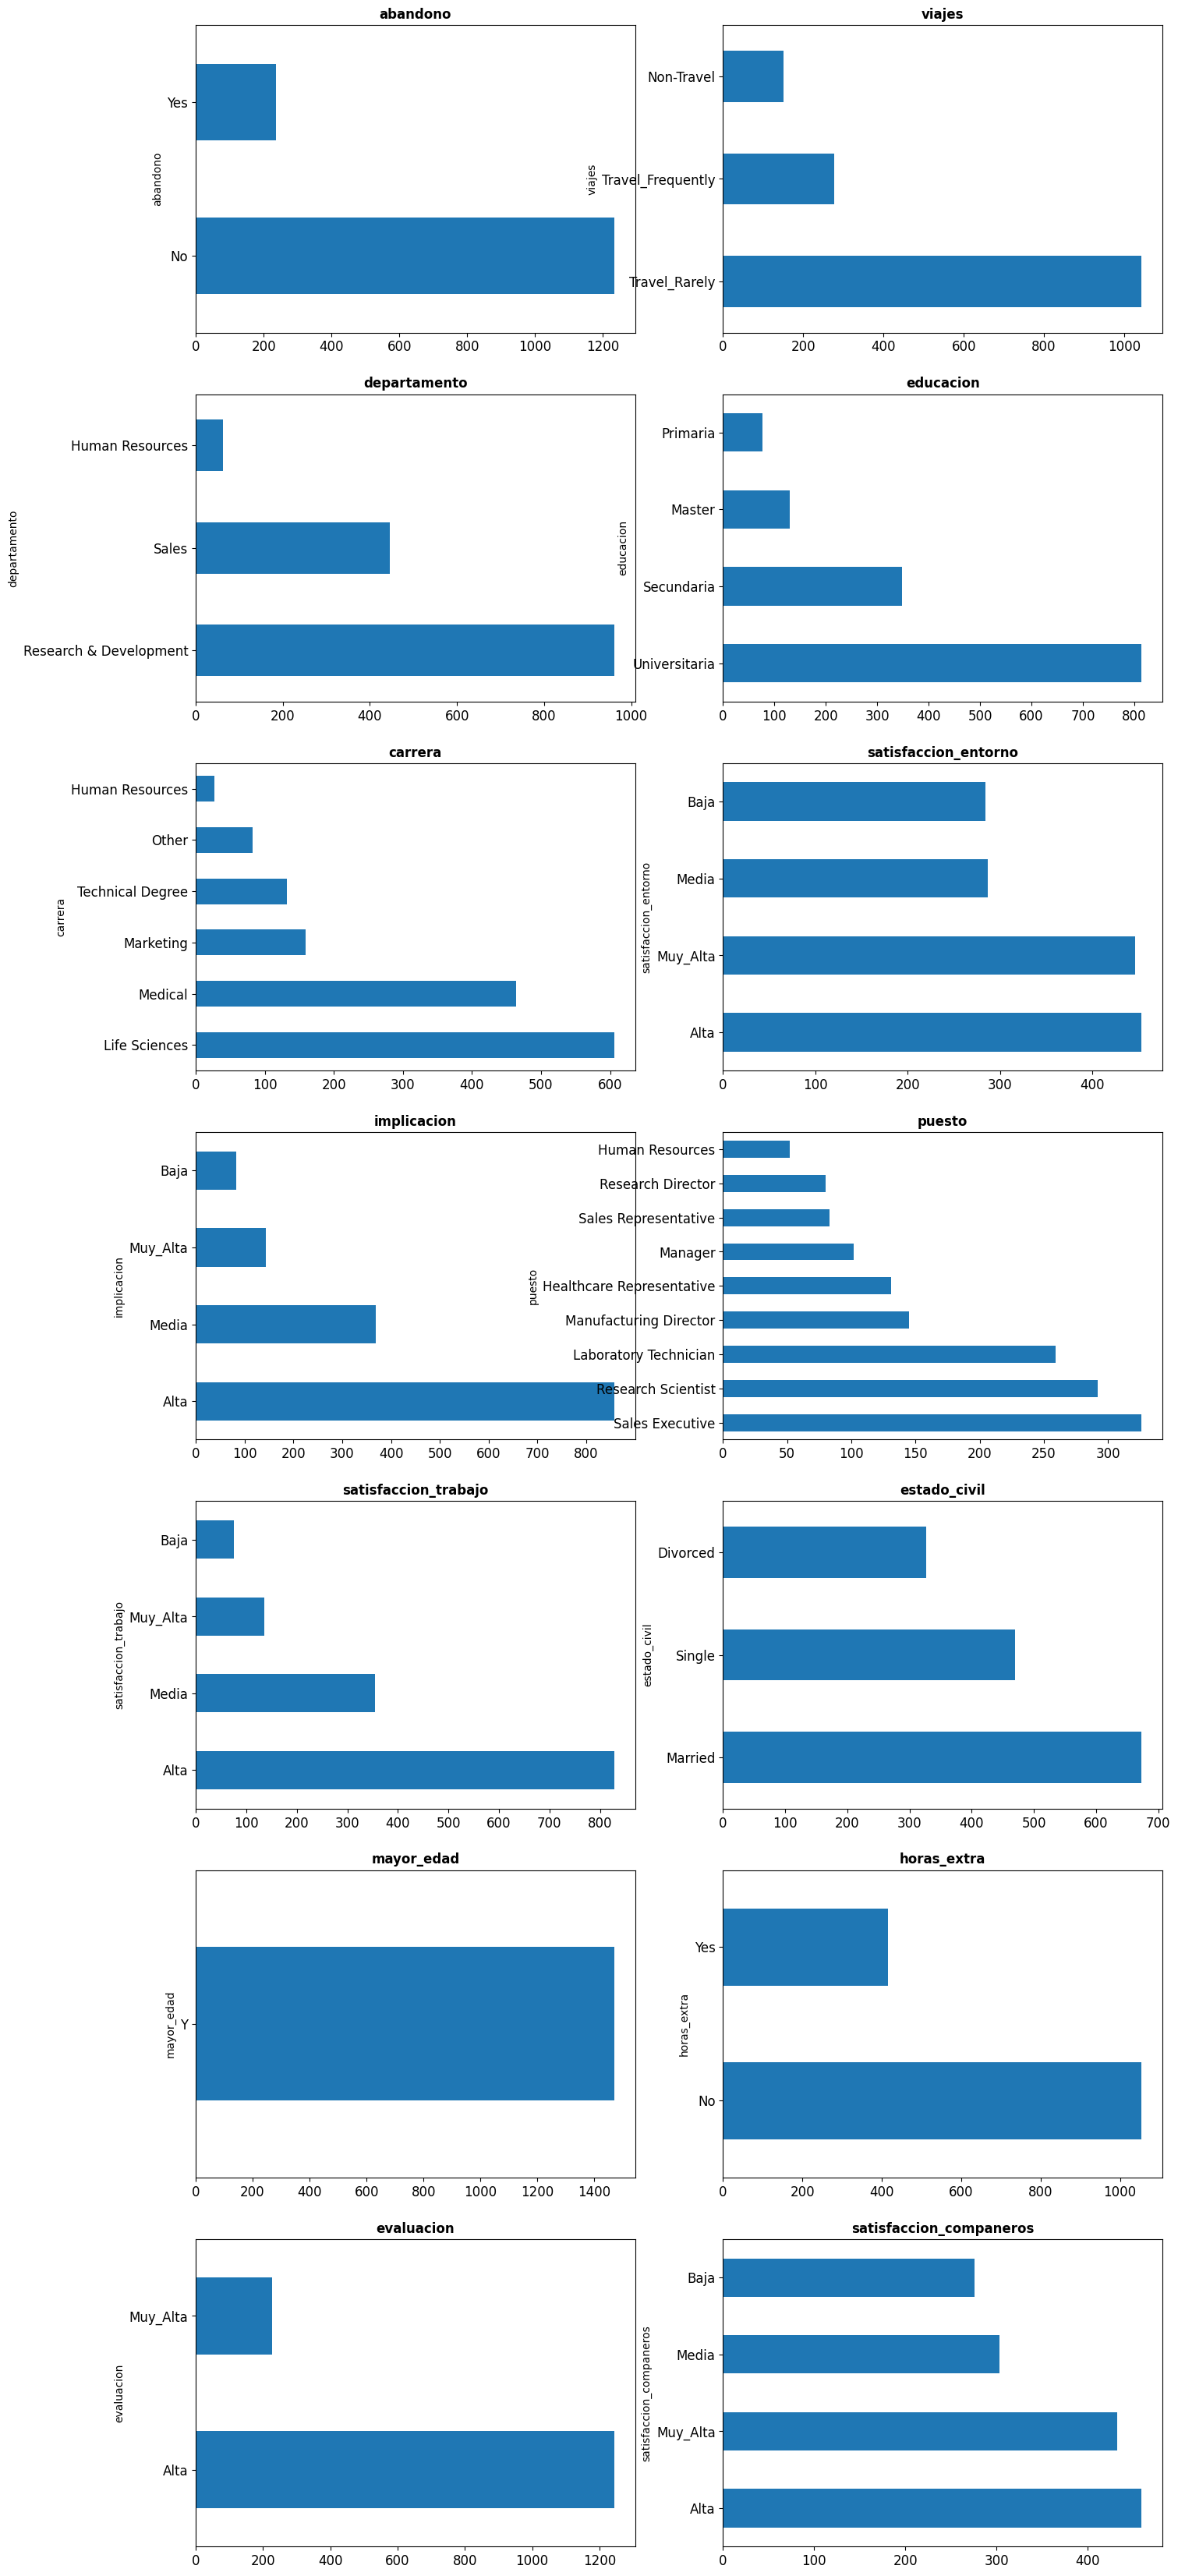

In [10]:
graficos_eda_categoricos (df.select_dtypes("O"))

In [11]:
#Mayores de edad tiene un solo valor----- eliminar
#Imputaciones pendiente de categoria
#imputar: educacion ---- Universitaria, satisfaccion-----alta, impicacion----- alta
df.drop(columns='mayor_edad', inplace=True)
df['educacion'] = df['educacion'].fillna('Universitaria')
df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')
df['implicacion'] = df['implicacion'].fillna('Alta')


In [12]:
#EDA VARIABLES NUMERICAS
def estadisticos_cont (num): 
#Calculamos describe
    estadisticos =num.describe().T
#Añadimos la mediana
    estadisticos['median'] = num.median()
#Reordenamos para que la mediana esté al lado de la media      desviacion tipica
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
#Lo devolvemos
    return(estadisticos)

In [13]:
estadisticos_cont (df.select_dtypes("number"))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


In [14]:
#variable empleaos tiene un solo valor --- eliminar
#sexo solo 4 ----eliminar
# horas por quincena ----eliminar
df.drop(columns=['empleados','sexo','horas_quincena'], inplace=True)

In [15]:
#GENERACION DE INSIGHTS
#Cuantificando el problema, Cual es la tasa de abandono?
df['abandono'].value_counts(normalize=True) * 100




abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

<Axes: xlabel='educacion'>

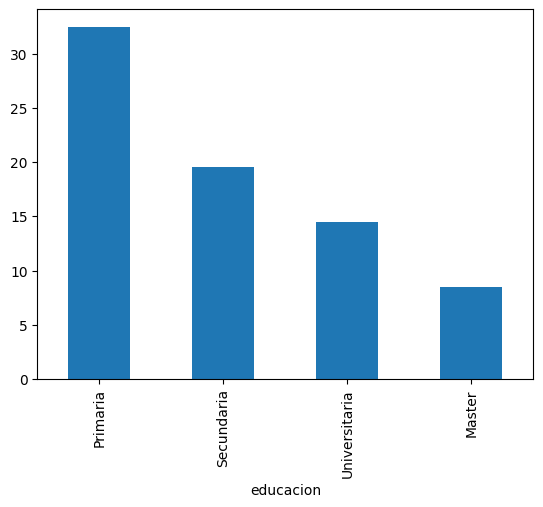

In [16]:
#Hay algun tipo de perfil de empleado que que deja la empresa?
#transformar abandono a numerico
df["abandono"] = df.abandono.map({"No":0,"Yes":1})
temp=df.groupby("educacion").abandono.mean().sort_values(ascending=False)*100
temp.plot.bar()

<Axes: xlabel='horas_extra'>

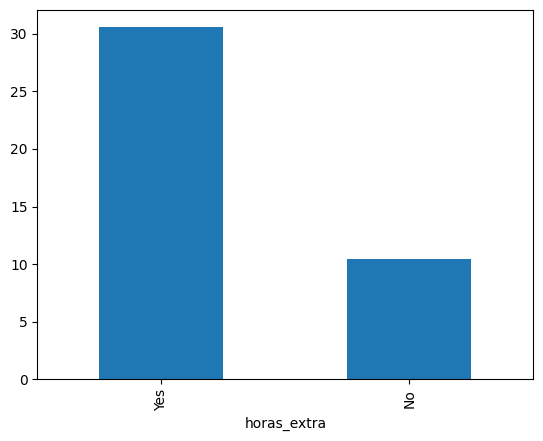

In [17]:
temp=df.groupby("horas_extra").abandono.mean().sort_values(ascending=False)*100
temp.plot.bar()

<Axes: xlabel='puesto'>

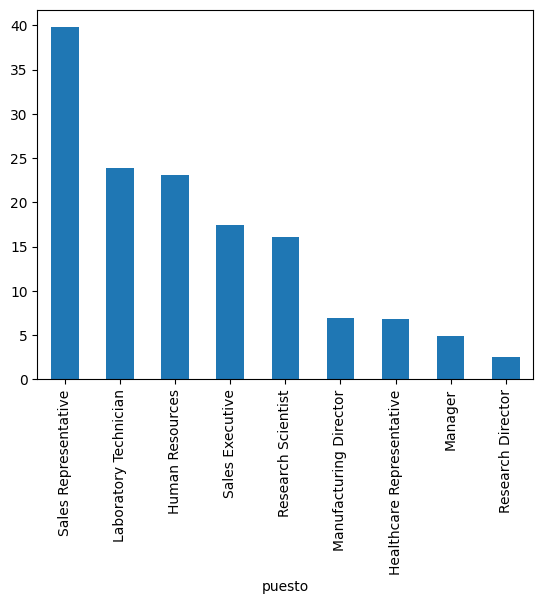

In [18]:
temp=df.groupby("puesto").abandono.mean().sort_values(ascending=False)*100
temp.plot.bar()

<Axes: xlabel='abandono'>

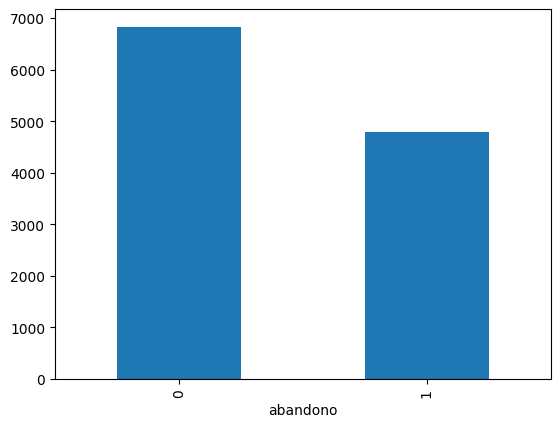

In [19]:
temp=df.groupby("abandono").salario_mes.mean()
temp.plot.bar()

In [20]:
#CONCLUCIONES
#El perfil del empleado es : Bajo nivel educativo, Soltero, Trabaja en ventas, Bajo salario, Ala carga de horas extra

In [21]:
#ESTIMACION DE IMPACTO ECONOMICO DE LA EMPRESA 
# Creamos una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x *12) 
df[['salario_mes', 'salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [22]:
# Calculamos el impacto económico de cada empleado si deja la empresa #Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
            (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
            (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000), 
            (df['salario_ano'] > 75000)]
#Lista de resultados
resultados = [df.salario_ano * 0.161, df. salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]
#Aplicamos select
df['impacto_abandono'] = np.select(condiciones, resultados, default = -999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,puesto,satisfaccion_trabajo,estado_civil,salario_mes,num_empresas_anteriores,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,Sales Executive,Alta,Single,5993,8,Yes,11,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,Research Scientist,Media,Married,5130,1,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,Laboratory Technician,Media,Single,2090,6,Yes,15,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,Research Scientist,Alta,Married,2909,1,Yes,11,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,Laboratory Technician,Alta,Married,3468,9,No,12,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,Laboratory Technician,Muy_Alta,Married,2571,4,No,17,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,Healthcare Representative,Media,Married,9991,4,No,15,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,Manufacturing Director,Muy_Alta,Married,6142,1,Yes,20,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


In [23]:
#Cuanto nos ha costado el ultimo año este problema
coste_total = df.loc[df.abandono==1].impacto_abandono.sum()
coste_total

np.float64(2719005.912)

In [24]:
#Cuanto nos cuesta que los empleados no esten motivados?
df.loc[(df.abandono==1)&(df.implicacion=="Baja")].impacto_abandono.sum()


np.float64(368672.688)

In [25]:
#posibles escenacrios
print (f"Reducir un 10% la fuga de empleados nos ahorraria {int(coste_total *0.1)}$ cada año.")
print (f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total *0.2)}$ cada año.")
print (f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraria 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.


In [26]:
#personal de ventas es el puesto que mas se van
#calculamos el porcentaje de las personas que se fueron el año pasado
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df. abandono ==1)]) 
porc_pasado = abandonos_repre_pasado / total_repre_pasado
porc_pasado

0.39759036144578314

In [27]:
#cuantos de ellos se iran este año
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono==0)])
se_iran= int(total_repre_actual * porc_pasado)
se_iran

19

In [28]:
#cuantos de ellos se se pueden retener (hipotesis del 30%)
retenemos = int(se_iran * 0.3)
ahorramos= df.loc[(df.puesto=='Sales Representative') & (df.abandono==0),"impacto_abandono"].sum()*porc_pasado*0.3
print(f"Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.")

Podemos retener 5 representantes de ventas y ello supondría ahorrar 37447.22424578312$.


In [29]:
#MODELO DE MACHINE LEARNING
df_ml=df.copy()

In [30]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empresas_

In [31]:
#Preparacion para los datos no nulos y todas las variables deben estar en numeros   scikit-learn 
from sklearn.preprocessing import OneHotEncoder

#categoricas
cat = df_ml.select_dtypes("O")

#instanciamos
ohe = OneHotEncoder(sparse_output=False)

#entrenamos
cat_ohe = ohe.fit_transform(cat)

#ponemos los nombres
cat_ohe=pd.DataFrame(cat_ohe, columns=ohe.get_feature_names_out(input_features=cat.columns)).reset_index(drop=True)

In [32]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,carrera_Human Resources,carrera_Life Sciences,carrera_Marketing,carrera_Medical,carrera_Other,carrera_Technical Degree,satisfaccion_entorno_Alta,satisfaccion_entorno_Baja,satisfaccion_entorno_Media,satisfaccion_entorno_Muy_Alta,implicacion_Alta,implicacion_Baja,implicacion_Media,implicacion_Muy_Alta,puesto_Healthcare Representative,puesto_Human Resources,puesto_Laboratory Technician,puesto_Manager,puesto_Manufacturing Director,puesto_Research Director,puesto_Research Scientist,puesto_Sales Executive,puesto_Sales Representative,satisfaccion_trabajo_Alta,satisfaccion_trabajo_Baja,satisfaccion_trabajo_Media,satisfaccion_trabajo_Muy_Alta,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [33]:
#seleccionamos las variables numericas para juntarlas con el data frame
num=df.select_dtypes("number").reset_index(drop=True)

In [34]:
#juntamos
df_ml=pd.concat([cat_ohe,num],axis=1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,carrera_Human Resources,carrera_Life Sciences,carrera_Marketing,carrera_Medical,carrera_Other,carrera_Technical Degree,satisfaccion_entorno_Alta,satisfaccion_entorno_Baja,satisfaccion_entorno_Media,satisfaccion_entorno_Muy_Alta,implicacion_Alta,implicacion_Baja,implicacion_Media,implicacion_Muy_Alta,puesto_Healthcare Representative,puesto_Human Resources,puesto_Laboratory Technician,puesto_Manager,puesto_Manufacturing Director,puesto_Research Director,puesto_Research Scientist,puesto_Sales Executive,puesto_Sales Representative,satisfaccion_trabajo_Alta,satisfaccion_trabajo_Baja,satisfaccion_trabajo_Media,satisfaccion_trabajo_Muy_Alta,estado_civil_Divorced,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta,edad,abandono,distancia_casa,nivel_laboral,salario_mes,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,41,1,1,2,5993,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49,0,8,2,5130,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,37,1,2,1,2090,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,33,0,3,1,2909,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,27,0,2,1,3468,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,36,0,23,2,2571,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,39,0,6,3,9991,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,27,0,4,2,6142,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,49,0,2,2,5390,2,14,0,17,3,9,0,8,64680,13194.720


In [35]:
#Diseño de la modelizacion
#separacion de predictoras
x=df_ml.drop(columns="abandono")
y=df_ml["abandono"]

In [36]:
#separacion de train y test
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y= train_test_split(x, y, test_size = 0.3)

In [37]:
#entranamiento del modelo sobre train 
from sklearn.tree import DecisionTreeClassifier
#Instanciar
ac= DecisionTreeClassifier (max_depth=4)
#Entrenar
ac.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=4)

In [38]:
# Predicción y validacion sobre el test 
pred = ac.predict_proba (test_x) [:, 1]
pred[:20]

array([0.04568528, 0.06930693, 0.04568528, 0.04568528, 0.5483871 ,
       0.04568528, 0.04568528, 0.27118644, 0.04568528, 0.09865471,
       0.09865471, 0.09865471, 0.09865471, 1.        , 0.06930693,
       0.04568528, 0.2       , 0.5483871 , 0.2       , 0.15384615])

In [39]:
# Evaluación
from sklearn.metrics import roc_auc_score
roc_auc_score (test_y, pred)

np.float64(0.7360328249336869)

[Text(0.5, 0.9, 'node #0\nhoras_extra_No <= 0.5\nsamples = 100.0%\nvalue = [0.83, 0.17]'),
 Text(0.25, 0.7, 'node #1\nnivel_laboral <= 1.5\nsamples = 27.7%\nvalue = [0.66, 0.34]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'node #2\nnivel_acciones <= 0.5\nsamples = 10.8%\nvalue = [0.45, 0.55]'),
 Text(0.0625, 0.3, 'node #3\ndistancia_casa <= 6.5\nsamples = 5.2%\nvalue = [0.28, 0.72]'),
 Text(0.03125, 0.1, 'node #4\nsamples = 3.0%\nvalue = [0.45, 0.55]'),
 Text(0.09375, 0.1, 'node #5\nsamples = 2.1%\nvalue = [0.05, 0.95]'),
 Text(0.1875, 0.3, 'node #6\nnum_formaciones_ult_ano <= 2.5\nsamples = 5.6%\nvalue = [0.6, 0.4]'),
 Text(0.15625, 0.1, 'node #7\nsamples = 2.9%\nvalue = [0.43, 0.57]'),
 Text(0.21875, 0.1, 'node #8\nsamples = 2.7%\nvalue = [0.79, 0.21]'),
 Text(0.375, 0.5, 'node #9\npuesto_Sales Executive <= 0.5\nsamples = 16.9%\nvalue = [0.79, 0.21]'),
 Text(0.3125, 0.3, 'node #10\ndistancia_casa <= 28.5\nsamples = 10.0%\nvalue = [0.91, 0.09]'),
 Text(0.28125, 0.1, 'node #11\ns

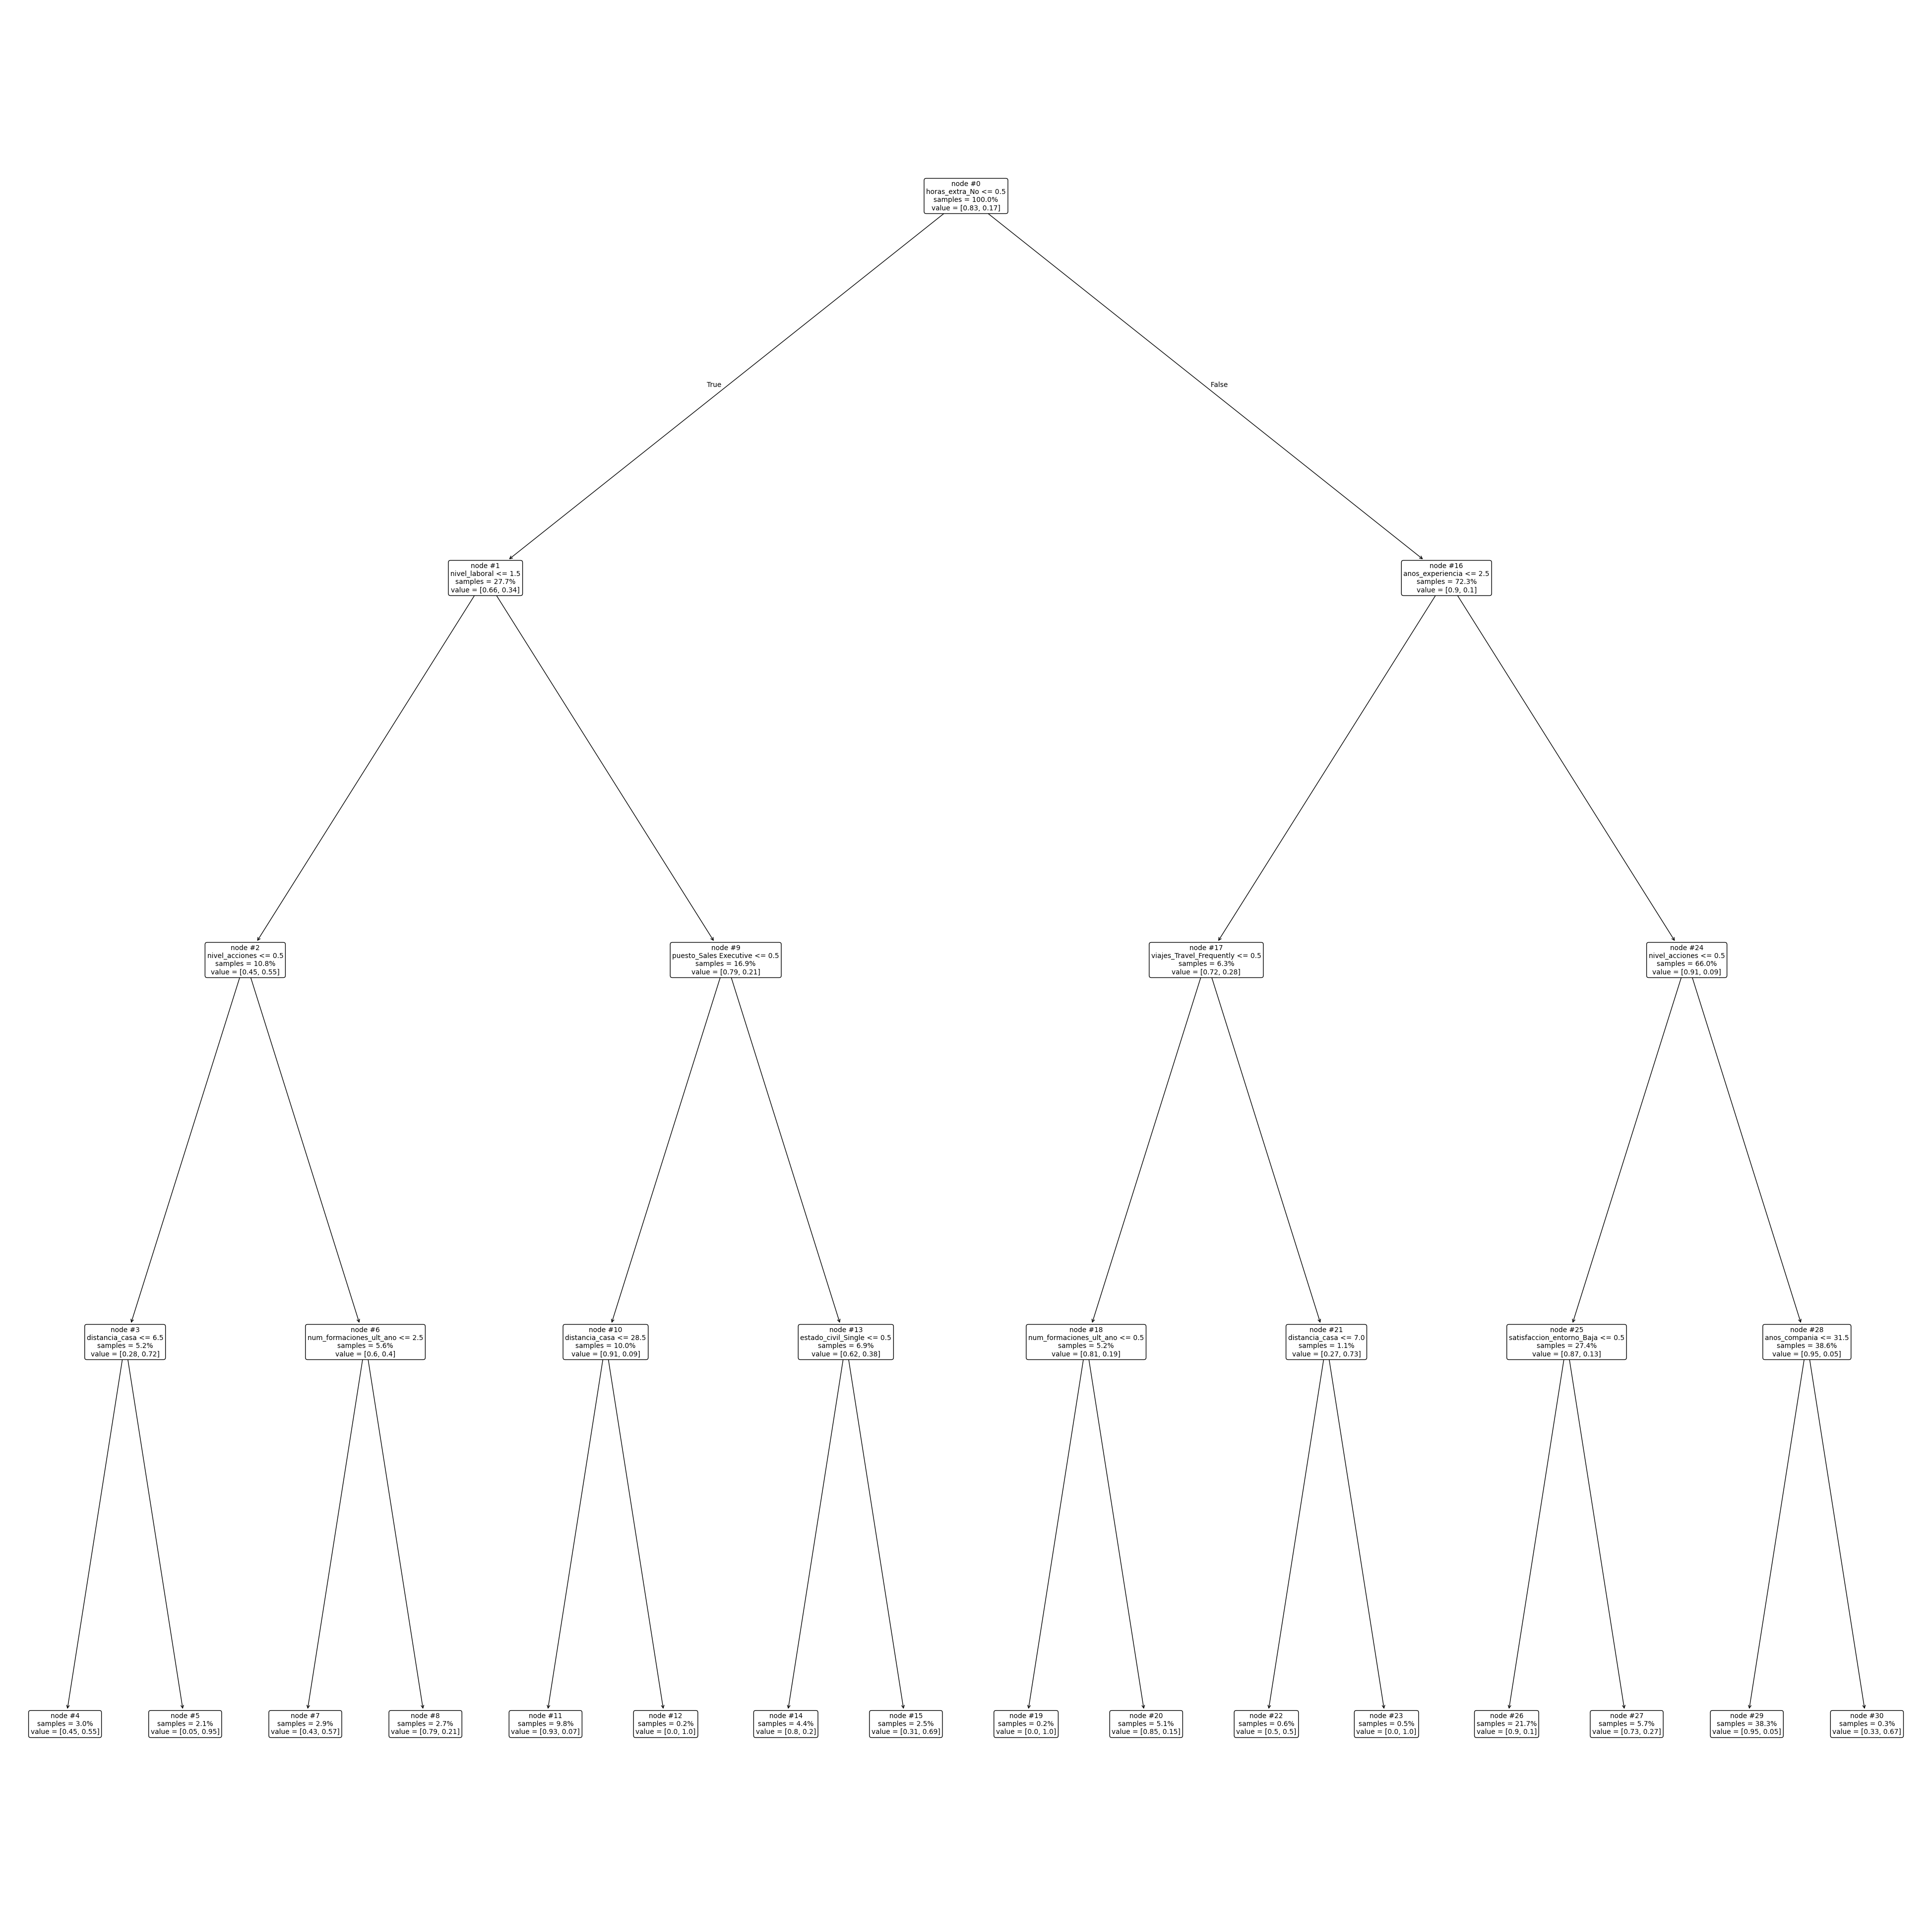

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize = (50,50))

plot_tree(ac,
            feature_names= test_x.columns,
            impurity = False,
            node_ids = True,
            proportion = True,
            rounded= True,
            precision = 2)  

<Axes: >

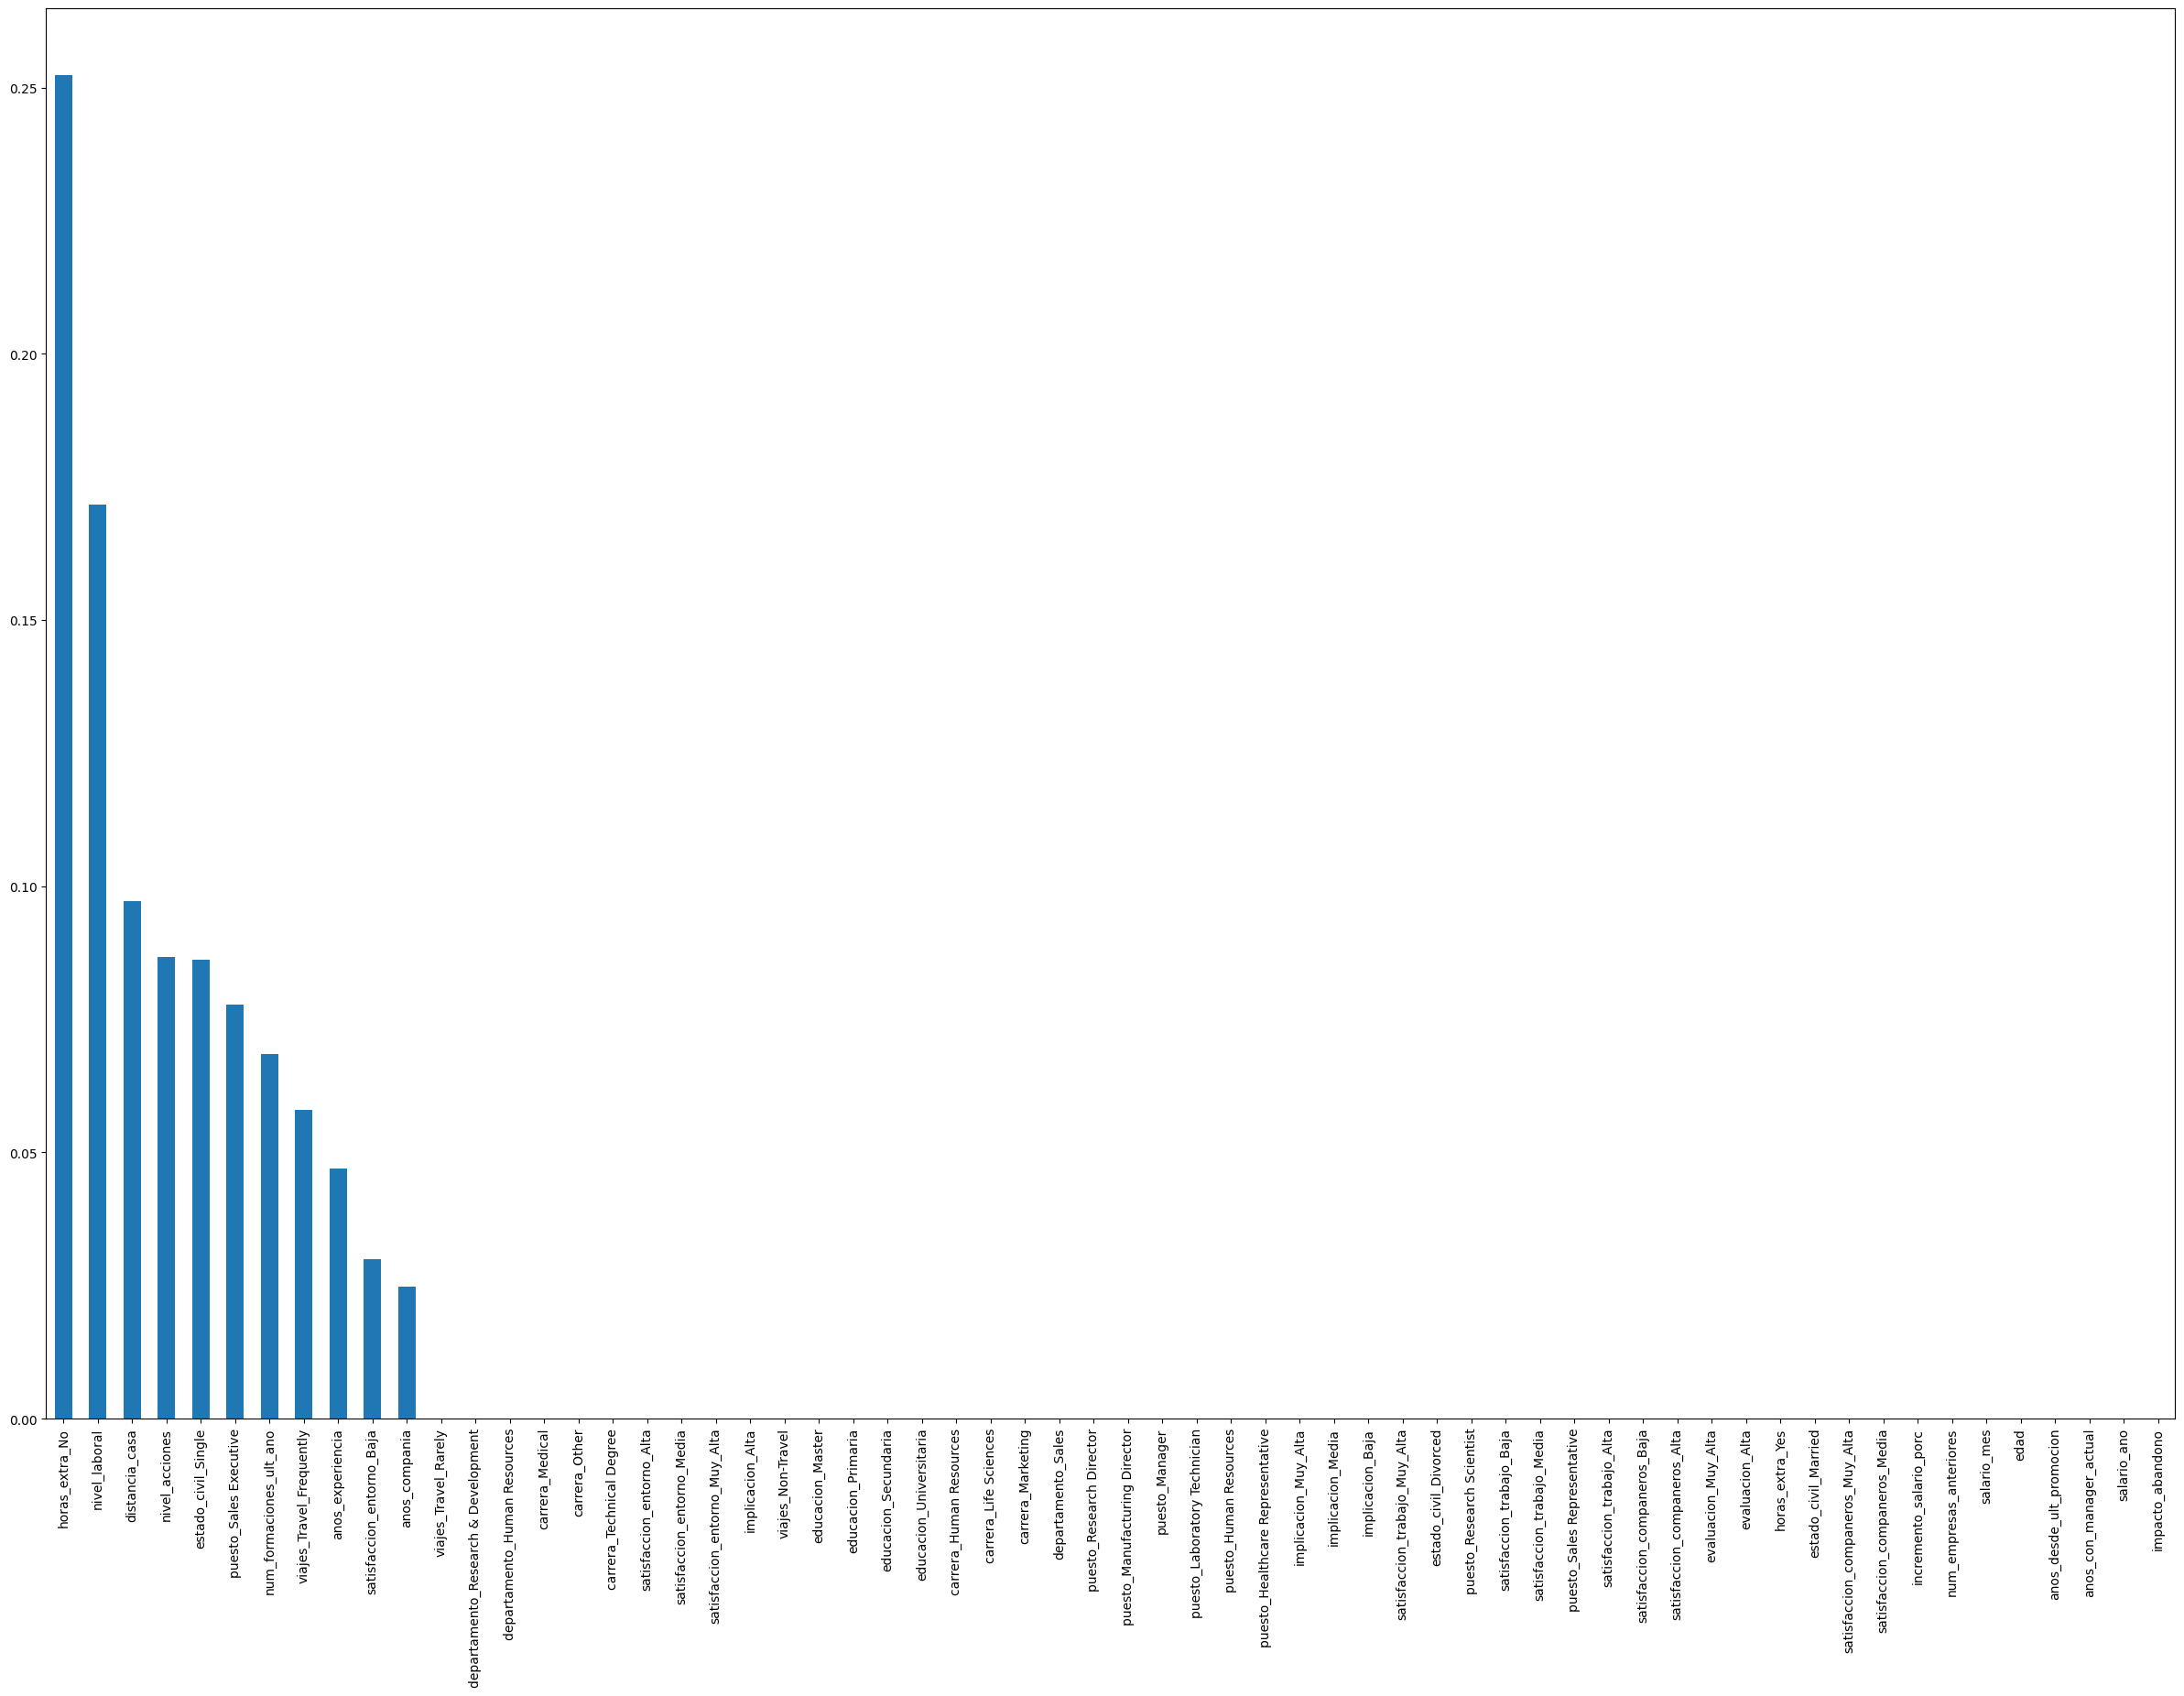

In [41]:
#importancia de las variables 
pd.Series(ac.feature_importances_,index=test_x.columns).sort_values (ascending=False).plot(kind ="bar",figsize=(30,20))

In [42]:
#importacion del scorin al df
df["scoring_abandono"]=ac.predict_proba(df_ml.drop(columns="abandono"))[:,1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,puesto,satisfaccion_trabajo,estado_civil,salario_mes,num_empresas_anteriores,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,Sales Executive,Alta,Single,5993,8,Yes,11,Alta,Baja,0,8,0,6,0,5,71916,14670.864,0.692308
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,Research Scientist,Media,Married,5130,1,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.045685
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,Laboratory Technician,Media,Single,2090,6,Yes,15,Alta,Media,0,7,3,0,0,0,25080,4037.880,0.548387
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,Research Scientist,Alta,Married,2909,1,Yes,11,Alta,Alta,0,8,3,8,3,0,34908,6876.876,0.548387
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,Laboratory Technician,Alta,Married,3468,9,No,12,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.045685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,Laboratory Technician,Muy_Alta,Married,2571,4,No,17,Alta,Alta,1,17,3,5,0,3,30852,6077.844,0.045685
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,Healthcare Representative,Media,Married,9991,4,No,15,Alta,Baja,1,9,5,7,1,7,119892,25177.320,0.045685
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,Manufacturing Director,Muy_Alta,Married,6142,1,Yes,20,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616,0.069307


In [43]:
df.sort_values(by="scoring_abandono",ascending=False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,puesto,satisfaccion_trabajo,estado_civil,salario_mes,num_empresas_anteriores,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023,23,1,Travel_Frequently,Sales,9,Universitaria,Marketing,Muy_Alta,Alta,1,Sales Representative,Alta,Married,1790,1,No,19,Alta,Baja,1,1,3,1,1,0,21480,3458.280,1.0
494,21,1,Travel_Rarely,Sales,12,Master,Life Sciences,Alta,Muy_Alta,1,Sales Representative,Alta,Single,2716,1,No,15,Alta,Muy_Alta,0,1,0,1,0,0,32592,6420.624,1.0
1928,29,1,Travel_Frequently,Sales,24,Universitaria,Technical Degree,Alta,Muy_Alta,1,Sales Representative,Muy_Alta,Single,1091,1,No,17,Alta,Muy_Alta,0,1,3,1,0,0,13092,2107.812,1.0
657,20,0,Travel_Rarely,Research & Development,1,Secundaria,Life Sciences,Muy_Alta,Media,1,Research Scientist,Media,Single,2836,1,No,13,Alta,Muy_Alta,0,1,0,1,0,0,34032,6704.304,1.0
648,30,1,Travel_Frequently,Sales,12,Secundaria,Life Sciences,Media,Media,1,Sales Representative,Media,Married,2033,1,No,18,Alta,Alta,1,1,2,1,0,0,24396,3927.756,1.0
282,38,1,Travel_Rarely,Research & Development,29,Universitaria,Medical,Media,Alta,2,Healthcare Representative,Alta,Married,6673,7,Yes,19,Alta,Media,0,17,2,1,0,0,80076,16815.960,1.0
1467,34,1,Travel_Rarely,Human Resources,9,Universitaria,Technical Degree,Baja,Alta,1,Human Resources,Alta,Married,2742,1,No,15,Alta,Muy_Alta,0,2,0,2,2,2,32904,6482.088,1.0
1465,45,0,Travel_Rarely,Research & Development,29,Universitaria,Technical Degree,Media,Alta,3,Manufacturing Director,Alta,Married,9380,4,Yes,18,Alta,Muy_Alta,2,10,4,3,1,2,112560,23637.600,1.0
1107,26,1,Travel_Rarely,Research & Development,21,Universitaria,Medical,Baja,Alta,1,Laboratory Technician,Alta,Divorced,2377,1,No,20,Muy_Alta,Alta,1,1,0,1,0,0,28524,4592.364,1.0


<Axes: title={'center': 'scoring_abandono'}, xlabel='puesto'>

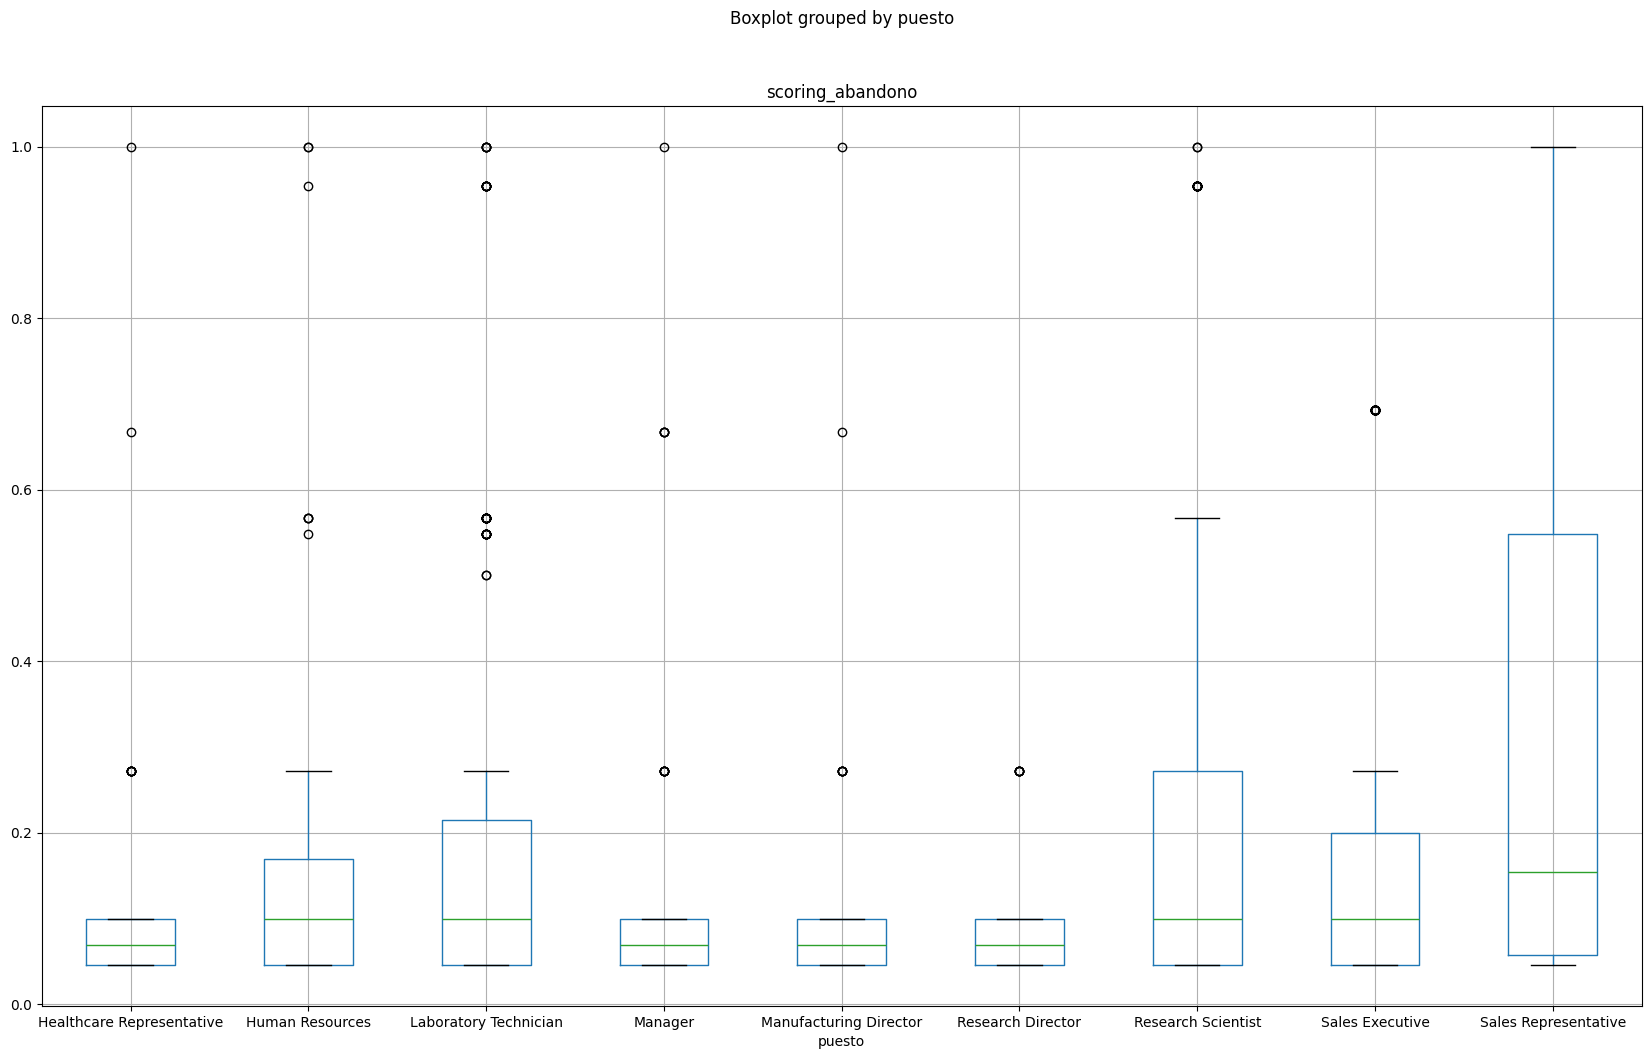

In [44]:
df.boxplot (column='scoring_abandono', by='puesto', figsize=(20,12))
#grfico de caja y bigote

In [48]:
import os
import pandas as pd

# Si 'ID' es el índice, conviértelo a columna
if 'ID' not in df.columns:
    df.reset_index(drop=False, inplace=True)

# Establecer la ruta de descarga
if os.name == 'nt':  # Windows
    downloads_folder = os.path.join(os.environ['USERPROFILE'], 'Downloads')
file_path = os.path.join(downloads_folder, 'abandono_con_scoring.xlsx')

# Exportar a Excel
df.to_excel(file_path, index=False)
print(f"Archivo Excel guardado en {file_path}")

Archivo Excel guardado en C:\Users\dg_an\Downloads\abandono_con_scoring.xlsx
